In [1]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import random

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('customer_data.csv')

In [3]:
df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,spending_score
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,email,26,jun,303.0,4.0,0.0,0,unknown,0.0,40
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0.0,83
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0.0,0,unknown,0.0,12
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,email,20,may,127.0,3.0,0.0,0,unknown,0.0,81
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,0.0,0,unknown,0.0,80


In [4]:
df.shape

(45211, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                45211 non-null  object 
 1   customer_age                      45211 non-null  float64
 2   job_type                          45211 non-null  object 
 3   marital                           45211 non-null  object 
 4   education                         45211 non-null  object 
 5   default                           45211 non-null  object 
 6   balance                           45211 non-null  float64
 7   housing_loan                      45211 non-null  object 
 8   personal_loan                     45211 non-null  object 
 9   communication_type                45211 non-null  object 
 10  day_of_month                      45211 non-null  int64  
 11  month                             45211 non-null  object 
 12  last

In [6]:
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed,spending_score
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,39.647342,1342.655836,15.806419,255.213200,2.753334,41.015195,0.580323,0.075070,53.030789
std,12.034303,2998.286959,8.322476,257.692091,3.090163,99.792615,2.303441,0.263508,26.810608
min,0.000000,-8020.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,32.000000,60.000000,8.000000,100.000000,1.000000,0.000000,0.000000,0.000000,30.000000
50%,38.000000,434.000000,16.000000,178.000000,2.000000,0.000000,0.000000,0.000000,53.000000
75%,48.000000,1404.500000,21.000000,316.000000,3.000000,0.000000,0.000000,0.000000,76.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000,99.000000


In [7]:
df.isna().sum()

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
spending_score                      0
dtype: int64

In [8]:
# The function that plots number of clusters against sum of squared error to find the best number of clusters

def get_best_number_of_clusters(target_column):
    
    if(target_column not in df.columns):
        print('ERROR: Target column not found in data frame')
        return
    
    sse={}

    df_cluster = df[[target_column]]

    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
        df_age_cluster["clusters"] = kmeans.labels_
        sse[k] = kmeans.inertia_ 

    fig = plt.figure(figsize=(10,7))
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
    plt.show()

    for i in range(1,len(sse.keys())):
        curr = list(sse.values())[i]
        prev = list(sse.values())[i-1]

        if((prev-curr)<sse_threshold):
            clusters = list(sse.keys())[i]
            break

In [9]:
# The function that create KMeans machine learning model for cluster analysis of target column

def create_KMeans_model(target_column, clusters = 3):
    clusters = clusters
    
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(df[[target_column]])
    
    df[target_column+'_cluster'] = kmeans.predict(df[[target_column]])
    
    def get_df_of_cluster(n,c):
        return df[df[target_column+'_cluster']==n][c]

    # Random color list
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(clusters)]

    fig = plt.figure(figsize=(10,7))

    for n in range(0,clusters):
        plt.scatter(get_df_of_cluster(n,'customer_age'),get_df_of_cluster(n,target_column), color=color[n])

    plt.xlabel('customer_age')
    plt.ylabel('{}'.format(target_column))
    plt.title('customer_age V/S {}'.format(target_column))
    plt.show()
    
    
    print('Number of clusters : {}'.format(clusters))
    print('SSE : {}'.format(kmeans.inertia_))
      
    return kmeans
    

### Age Clusters

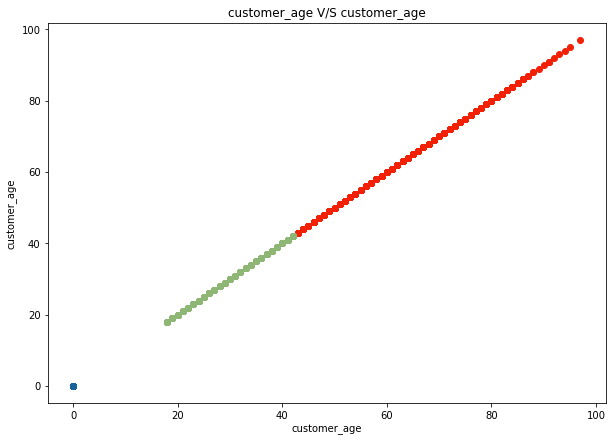

Number of clusters : 3
SSE : 1577291.873104934


KMeans(n_clusters=3)

In [10]:
create_KMeans_model('customer_age',3)

### Balance clusters

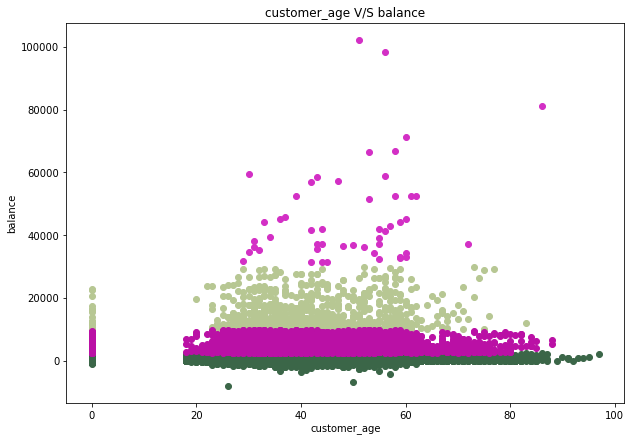

Number of clusters : 4
SSE : 67823309851.47903


KMeans(n_clusters=4)

In [11]:
create_KMeans_model('balance',4)

### Spending clusters

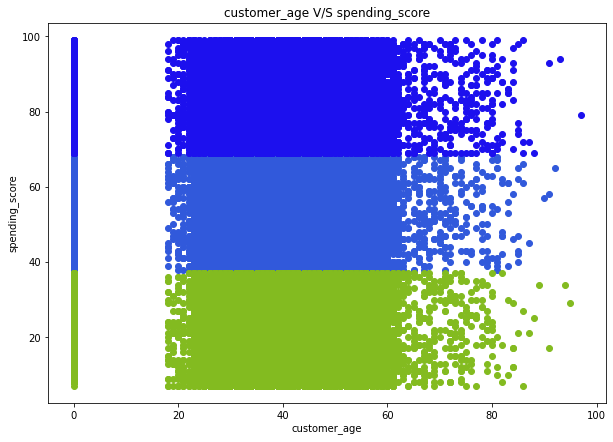

Number of clusters : 3
SSE : 3619316.987998502


KMeans(n_clusters=3)

In [12]:
create_KMeans_model('spending_score',3)

In [13]:
df['OverallScore'] = df['customer_age_cluster'] + df['balance_cluster'] + df['spending_score_cluster']

In [14]:
df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,...,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,spending_score,customer_age_cluster,balance_cluster,spending_score_cluster,OverallScore
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,email,...,4.0,0.0,0,unknown,0.0,40,1,0,0,1
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,...,2.0,132.0,1,other,0.0,83,1,0,1,2
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,...,4.0,0.0,0,unknown,0.0,12,0,0,2,2
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,email,...,3.0,0.0,0,unknown,0.0,81,1,0,1,2
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,...,2.0,0.0,0,unknown,0.0,80,1,0,1,2


In [15]:
df.groupby('OverallScore')['customer_age','balance','spending_score'].mean()

,customer_age,balance,spending_score
OverallScore,,,
0,51.320930,569.384778,53.047569
1,40.229584,645.863921,64.340738
2,39.293969,849.798145,60.850103
3,34.363792,1413.977904,27.512169
4,37.582070,5041.322034,59.846566
5,41.805600,4895.109878,55.197042
6,32.743852,4726.529713,24.836066
7,0.000000,4363.705882,22.676471


In [16]:
df.to_csv("segmentation_data.csv",index=False)